# Fundamentals of Machine Learning
Dominique Cheray & Manuel Krämer
## Kernelized (Ridge) Regression

In [1]:
import numpy as np
from scipy import misc
import matplotlib.pyplot as plt
import copy
from sklearn.metrics.pairwise import euclidean_distances

In [2]:
def kernel_function(X1, X2, sigma):
    # max distance to consider pixels neighbors
    max_dist = 50
    # upper part of given kernel function is squared euclidean
    dist = euclidean_distances(X1, X2, squared=True)
    # rest of kernel function as given
    kernel = (dist / (2 * np.square(sigma)))
    kernel = np.exp((kernel * (-1)))
    # before returning the kernel set all entries to zero
    # where distance was too big to consider the pixels
    # neighbors
    kernel[dist > max_dist] = 0
    return kernel

In [3]:
def kernel_ridge_regression(X_train, X_test, y_train, N):
    sigma = 3
    # calculate G which is just the kernel function for all
    # pixels with knwon grey value
    G = kernel_function(train_img_coords, train_img_coords, sigma)
    # set tau and construct the diagonale matrix of taus
    tau = 0.4
    tau_matrix = np.zeros((N, N))
    np.fill_diagonal(tau_matrix, tau)
    # now calculate alpha
    alpha = y_train.T.dot(np.linalg.inv((G + tau_matrix)))
    # list to store newly calculated y
    new_y = []
    for i in range(len(X_test)):
        # now for every pixel with unknown grey value calculate the kernel function
        kernel_vec = kernel_function(X_test[i].reshape(1, -1), X_train, sigma)[0]
        # and then multiply it with the alpha vector to get the new y
        y = alpha.dot(kernel_vec)
        new_y.append(y)
    # return array of new ys
    return np.asarray(new_y)

In [4]:
def nadaraya_watson(X_train, X_test, y_train):
    # list to store newly calculated y
    y_new = []
    sigma = 1
    for i in range(len(X_test)):
        # for every unknown pixel calculate its kernel function with the known pixels
        kernel_vec = kernel_function(X_test[i].reshape(1, -1), X_train, sigma)[0]
        # then multiply it with the knwon greyvalues  
        y = y_train.dot(kernel_vec)
        # sum the results of the kernel function
        kernel_sum = np.sum(kernel_vec)
        # and divide the new y value by the summed kernel function
        y = y / kernel_sum
        y_new.append(y)
    return np.asarray(y_new)

In [5]:
# load the image to reconstruct
img = misc.imread('cc_90.png')
# build an array of image coordinates
xx, yy = np.indices((img.shape[0], img.shape[1]))
img_coords = np.vstack((xx.flatten(), yy.flatten())).T
# response vector is the flattened image
y = img.flatten()
# pixels not having greyvalue 0 are for training
train_img_coords = img_coords[y != 0]
# pixels with zero greyvalue are for testing
test_img_coord = img_coords[y == 0]
# now cut y accordingly
y_train = y[y != 0]
N = y_train.shape[0]

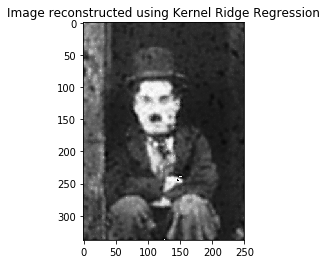

In [6]:
# get the greyvalues for the missing pixels using the kernel ridge regression
new_y = kernel_ridge_regression(train_img_coords, test_img_coord, y_train, N)
# first deepcopy the image
reconstructed_img = copy.deepcopy(img)
# now for every missing greyvalue fill it into the image to reconstruct
for i in range(test_img_coord.shape[0]):
    reconstructed_img[test_img_coord[i, 0]][test_img_coord[i, 1]] = new_y[i]
plt.imshow(reconstructed_img, cmap=plt.cm.Greys_r)
plt.title('Image reconstructed using Kernel Ridge Regression')
plt.show()

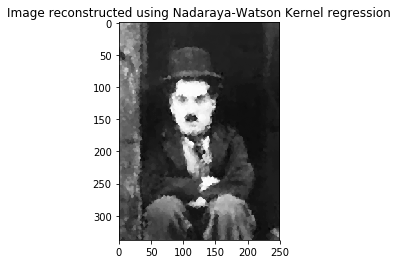

In [7]:
# get the greyvalues for the missing pixels using the Nadaraya-Watson kernel regression
y_new = nadaraya_watson(train_img_coords, test_img_coord, y_train)
# first deepcopy the original image
reconstructed_img_2 = copy.deepcopy(img)
# now for every missing greyvalue, fill it into the image to reconstruct
for i in range(test_img_coord.shape[0]):
    reconstructed_img_2[test_img_coord[i, 0]][test_img_coord[i, 1]] = y_new[i]
plt.imshow(reconstructed_img_2, cmap=plt.cm.Greys_r)
plt.title('Image reconstructed using Nadaraya-Watson Kernel regression')
plt.show()